In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
housing = 'data/housing_indicators.csv'
monthly = 'data/monthly_indicators.csv'

In [3]:
def get_data(file_name):
    '''
    
    '''
    
    return pd.read_csv(file_name)

In [68]:
def merge_data(df1, df2):
    '''
    
    '''
    df = df1.merge(df2)
    df.columns = df.columns.str.lower()
    df = df[['date', 'house_price_index', 'house_supply',\
       'mortgage_rate', 'employment_rate', 'stock_price_index', 'unemployment_rate']]
    df = df.iloc[:, [0, 1, 3, 4, 6, 7, 8]].iloc[:-1]
    
    print(f'Columns: {df.columns.to_list()}')
    
    return df

In [69]:
df = merge_data(get_data(housing), get_data(monthly))
df.sample()

Columns: ['date', 'house_price_index', 'house_supply', 'mortgage_rate', 'employment_rate', 'stock_price_index', 'unemployment_rate']


,date,house_price_index,house_supply,mortgage_rate,employment_rate,stock_price_index,unemployment_rate
20,1988-09-01,72.24,6.5,10.48,71.812109,15.00061,5.4


## Adding recession data
Source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States#Great_Depression_onward_(1929%E2%80%93present))

In [67]:
# early 90s --------> 1990-07-01 to 1991-03-01

# early 00s --------> 2001-03-01 to 2001-11-01

# great recession --> 2007-12-01 to 2009-06-01

# covid recession --> 2020-02-01 to 2020-04-01

In [70]:
recession = []

for date in df.date:
    if '1991-03-01' >= date >= '1990-07-01':
        recession.append('early90s')
        
    elif '2001-11-01' >= date >= '2001-03-01':
        recession.append('early00s')
        
    elif '2009-06-01' >= date >= '2007-12-01':
        recession.append('greatRecession')
        
    elif '2020-04-01' >= date >= '2020-02-01':
        recession.append('greatRecession')
        
    else:
        recession.append('noRecession')
        
df['recession'] = recession
df

,date,house_price_index,house_supply,mortgage_rate,employment_rate,stock_price_index,unemployment_rate,recession
0,1987-01-01,63.965,6.0,9.2040,70.163085,14.97068,6.6,noRecession
1,1987-02-01,64.424,6.2,9.0825,70.289205,15.86818,6.6,noRecession
2,1987-03-01,64.735,6.0,9.0350,70.321678,16.48206,6.6,noRecession
3,1987-04-01,65.132,6.0,9.8325,70.499062,16.22884,6.3,noRecession
4,1987-05-01,65.565,6.7,10.5960,70.808308,16.14232,6.3,noRecession
...,...,...,...,...,...,...,...,...
417,2021-10-01,273.154,6.9,3.0675,70.134363,156.85410,4.6,noRecession
418,2021-11-01,276.429,6.2,3.0675,70.587317,159.94283,4.2,noRecession
419,2021-12-01,280.190,5.6,3.0980,70.799610,157.33822,3.9,noRecession
420,2022-01-01,284.767,5.7,3.4450,70.748899,158.10031,4.0,noRecession


In [71]:
df.isna().sum()

date                 0
house_price_index    0
house_supply         0
mortgage_rate        0
employment_rate      0
stock_price_index    0
unemployment_rate    0
recession            0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 421
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               422 non-null    object 
 1   house_price_index  422 non-null    float64
 2   house_supply       422 non-null    float64
 3   mortgage_rate      422 non-null    float64
 4   employment_rate    422 non-null    float64
 5   stock_price_index  422 non-null    float64
 6   unemployment_rate  422 non-null    float64
 7   recession          422 non-null    object 
dtypes: float64(6), object(2)
memory usage: 29.7+ KB


## Distributions of Numeric Variables

array([[<AxesSubplot:title={'center':'house_price_index'}>,
        <AxesSubplot:title={'center':'house_supply'}>,
        <AxesSubplot:title={'center':'mortgage_rate'}>],
       [<AxesSubplot:title={'center':'employment_rate'}>,
        <AxesSubplot:title={'center':'stock_price_index'}>,
        <AxesSubplot:title={'center':'unemployment_rate'}>]], dtype=object)

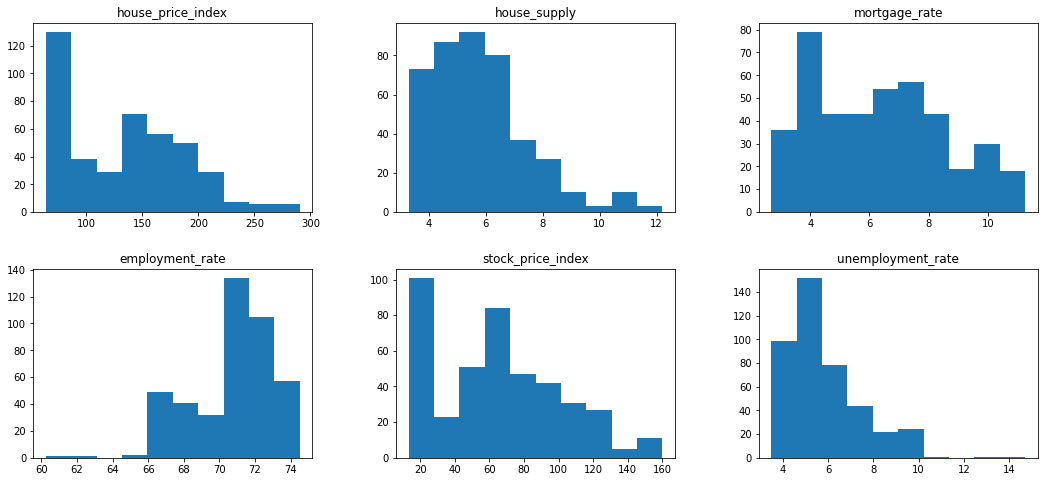

In [93]:
df.hist(figsize = (18, 8), layout = (2, 3), grid = False)

## Distributions of nonNumeric Variables
`recession`

<AxesSubplot:>

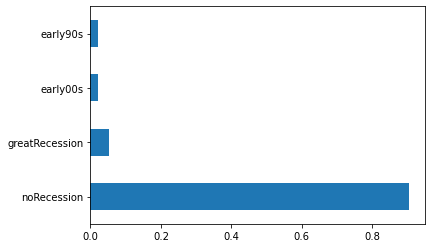

In [79]:
df.recession.value_counts(normalize = True).plot.barh()